# Sentiment Analysis of Twitter Data and Wordcloud

In [1]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re, warnings


from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from nltk.sentiment.util import *


In [2]:
filename='./coronavirus3.csv'
#filename='./tmp_coronavirus3.csv'
data = pd.read_csv(filename, encoding='utf-8')
print (len(data))

37689


In [3]:
data.columns = ['timestamp', 'text']

In [4]:
data['timestamp'].head

<bound method NDFrame.head of 0        2020-03-21 23:59:59
1        2020-03-21 23:59:59
2        2020-03-21 23:59:59
3        2020-03-21 23:59:59
4        2020-03-21 23:59:59
                ...         
37684    2020-03-21 23:57:07
37685    2020-03-21 23:57:07
37686    2020-03-21 23:57:07
37687    2020-03-21 23:57:07
37688    2020-03-21 23:57:07
Name: timestamp, Length: 37689, dtype: object>

In [5]:
data['text'].head

<bound method NDFrame.head of 0        RT @TalkDigitalNet: The Goddard Report with ho...
1        RT @yashar: The Justice Department has quietly...
2        RT @santo_aol: Robert Reich says airlines ‘sho...
3        RT @GCobber99: Coronavirus is spreading fear. ...
4        RT @TheDailyShow: Trump finds a way to sprinkl...
                               ...                        
37684    RT @AmbJohnBolton: China silenced coronavirus ...
37685    RT @markmobility: BREAKING: U.S. hospitals are...
37686    RT @ScottyPatriot1: IT BEGINS: Police in NEW J...
37687    RT @MollyJongFast: Wouldn’t it be so Florida i...
37688    RT @1MikeMorris: The New York Times is advisin...
Name: text, Length: 37689, dtype: object>

## Preprocessing the data

* Use re.sub(pattern, repl, string, count=0, flags=0)

In [6]:
#data['tweetos'] = ''
for i in range(len(data['text'])):
    data['text'][i] = " ".join( [word for word in data['text'][i].split() if ('http' or 'rt' or '@' or '<' ) not in word])
    
data['text'] = data['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
data['text'] = data['text'].apply(lambda x: re.sub('  ', ' ', x ))
data['text'] = data['text'].apply(lambda x: re.sub('rt', ' ', x ))


## Wordcloud

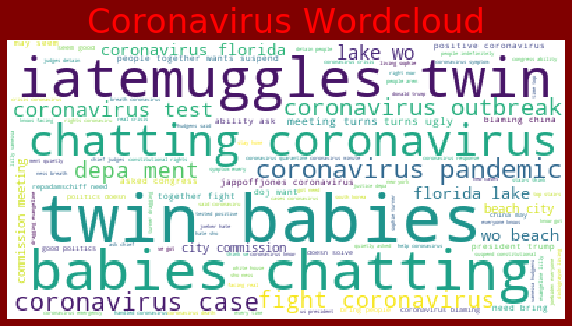

In [7]:
def PlotWordCloud(data, col):
    stopwords= set(STOPWORDS)
    #print (stopwords, len(stopwords))
    
    wordcloud = WordCloud(background_color='white',
                          max_words=1000,
                          stopwords=stopwords).generate(" ".join([tw for tw in data[col]]))

    #print (wordcloud.words_.keys())
    plt.figure(figsize=(10,8), facecolor='maroon', edgecolor='blue')
    plt.imshow(wordcloud, cmap='plasma')
    plt.axis("off")
    plt.title("Coronavirus Wordcloud", color='red', fontsize=34)

PlotWordCloud(data, 'text')

## Sentiment Analysis

In [8]:
%matplotlib inline
Analyzer=SentimentIntensityAnalyzer()

result = {"positive":0, "neutral":0,"negative":0}

for dat in data['text']:
    score = Analyzer.polarity_scores(dat)
    #print (score)
    if score['compound'] > 0.:
        result['positive'] +=1
    elif score['compound'] < 0.:
        result['negative'] +=1
    else:
        result['neutral'] +=1

print (result)    
    

{'positive': 11668, 'neutral': 10871, 'negative': 15150}


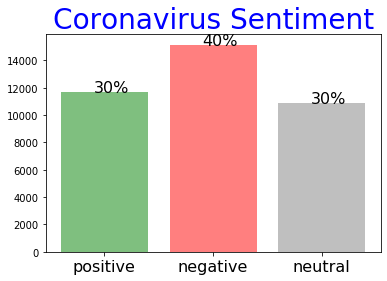

In [9]:
xx=range(3)
yy=[result['positive'], result['negative'], result['neutral']]
yy=np.array(yy)
yy_perc = (( yy/sum(yy) ).round(1)*100).astype(int)

plt.bar(xx, yy, color=['g','r','gray'], alpha=0.5,align='center' );
plt.xticks([0., 1., 2.], ['positive', 'negative', 'neutral'], fontsize=16);

for i in range(3):
    plt.text(i-0.1, yy[i], str(yy_perc[i])+'%', fontsize=16 );
plt.title('Coronavirus Sentiment', color='blue', fontsize=28);
    

# Wordcloud in Nepal Map

In [13]:
from PIL import Image

nepal=np.array(Image.open('nepal_map.png'))
print (nepal.shape)

(520, 900, 3)


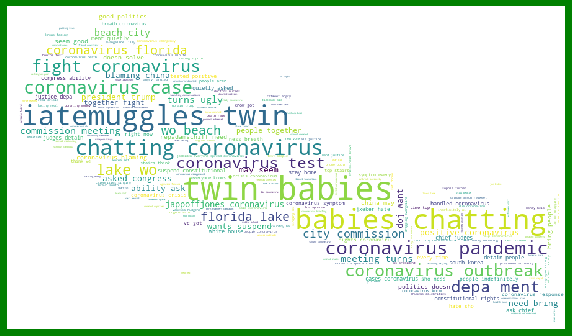

In [36]:
def PlotWordCloudNepal(data, col):
    #print (list(STOPWORDS))
    #new_stopwords = ['coronavirus case', 'coronavirus test','florida lake']
    new_stopwords = []
    stopwords = list(STOPWORDS) + new_stopwords
    
    #['TWIN' in stopwords]
    #print ( list(STOPWORDS).append('TWIN') )
        
    wordcloud = WordCloud(background_color='white',
                          max_words=1000,
                          mask=nepal,
                          stopwords=stopwords).generate(" ".join([tw for tw in data[col]]))

    #comment_words += " ".join(tokens)+" "
    #.generate(comment_words)
    
    plt.figure(figsize=(10,8), facecolor='green', edgecolor='blue')
    plt.imshow(wordcloud, cmap='plasma')
    plt.axis("off")
    #plt.title("Coronavirus Wordcloud", color='maroon', fontsize=34)

PlotWordCloudNepal(data, 'text')